# Proyecto Relación_Minutos
### Nombre Estudiante: Oscar Daniel Roncancio Lucas
### Explicación del problema:

Durante el desarrollo de este análisis exploratorio se desea identificar si existe una relación entre la cantidad de ingresos del cliente y el total de minutos usados por el mismo, para crear dicho análsis se hará uso de 2 bases de datos con información relevante, se tratara de comprender la información que se posee y se hará uso de multiples recursos de python. Para tener un poco más claro el desarrollo de este análisis listaré los pasos que seguiré en detalle:

1. Entendimiento del dataset Credito_dias.csv*
    - Importar librerias necesarias
    - Carga de la base de datos
    - Observar la estructura, dimensiones y los tipos de datos presentes en el dataset con métodos de pandas.
2. Limpieza de datos Credito_dias.csv*
    - Identificar y manipular valores faltantes
    - Identificar y manipular valores duplicados
    - Revisar que los tipos de datos sean los correctos
    - Ejercicio 1
3. Entendimiento y creación de dataset basado en los archivos de la carpeta datos_01*
    - Unir los archivos presentes en la carpeta datos_01
    - Observar la estructura, dimensiones y los tipos de datos presentes en el dataset con métodos de pandas.
4. Limpieza de datos.*
    - Identificar y manipular valores faltantes
    - Identificar y manipular valores duplicados
    - Revisar que los tipos de datos sean los correctos
5. Unir el dataset Credito_dias.csv al nuevo dataset creado a partir de la carpeta datos_01*
    - Ejercicio 2
    - Ejercicio 3
    - Ejercicio 4
6. Análisis de cada variable (descripción matemática).
    - Medidas estadísticas descriptivas para datos numéricos (media, mediana, moda, desviación  estándar, varianza, rango, etc.).
    - Análisis de las variables categóricas (conteo de valores únicos, frecuencia de cada categoría).
    - Gráficos (histogramas, barras).
7. Análisis de 2 variables para observar correlaciones.
    - Calcular correlación entre variables numéricas.
    - calcular tabulación cruzada si hay más de una variable categórica.
    - Gráficos (dispersión, box plots).
8. Análisis multivariable
    - Gráficos (heatmap, pairplots).
9. Detección de outliers.
    - Método IQR
    - Método Z-score
    - Tomar una decisión respecto a que hacer con los outliers detectados
10. Análisis visual (incluido en varios de los pasos previos).

# 1. Entendimiento del dataset
- Importar librerias necesarias
# Nota (descripción de las variables):
totrev: Ingresos del cliente.

totmou: Total de minutos usados por el cliente.

creditcd: Indicador de tarjeta de crédito.

eqpdays: Número de días (antigüedad) del equipo actual.

Customer_ID: Número identificador del cliente

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

- Carga de la base de datos

In [2]:
df_credito = pd.read_csv('datos_01/credito_dias.csv')

- Observar la estructura, dimensiones y los tipos de datos presentes en el dataset con métodos de pandas.
    - (head,tail,dtypes,shape,columns,index,sample,info)

In [3]:
#Traigo los primeros 5 valores del dataset
df_credito.head()

,totmou,totrev,creditcd,eqpdays,Customer_ID
0,7269.0,906.58,Y,371,1082423
1,13552.0,1172.25,N,83,1069232
2,4152.0,577.39,Y,675,1031705
3,1863.0,294.26,Y,218,1089806
4,4155.0,433.16,N,222,1076695


In [4]:
#Traigo los ultimos 5 valores del dataset
df_credito.tail()

,totmou,totrev,creditcd,eqpdays,Customer_ID
9995,2570.0,484.31,Y,611,1027614
9996,2105.0,583.36,Y,1243,1098422
9997,3690.0,294.29,Y,212,1096497
9998,3333.0,233.08,Y,290,1087248
9999,5025.0,1436.49,Y,1029,1099003


In [5]:
#Obervo los tipos de datos presentes
df_credito.dtypes

totmou         float64
totrev         float64
creditcd        object
eqpdays          int64
Customer_ID      int64
dtype: object

In [6]:
#Obtengo la dimensión del dataset
df_credito.shape

(10000, 5)

In [7]:
#Miro los nombres de las columnas
df_credito.columns

Index(['totmou', 'totrev', 'creditcd', 'eqpdays', 'Customer_ID'], dtype='object')

In [8]:
#Reviso los indices
df_credito.index

RangeIndex(start=0, stop=10000, step=1)

In [9]:
#Miro información general del dataset
df_credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   totmou       10000 non-null  float64
 1   totrev       10000 non-null  float64
 2   creditcd     9848 non-null   object 
 3   eqpdays      10000 non-null  int64  
 4   Customer_ID  10000 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 390.8+ KB


In [10]:
#Descripción estadística del dataset
df_credito.describe(include='all')

,totmou,totrev,creditcd,eqpdays,Customer_ID
count,10000.000000,10000.000000,9848,10000.000000,1.000000e+04
unique,NaN,NaN,2,NaN,NaN
top,NaN,NaN,Y,NaN,NaN
freq,NaN,NaN,6796,NaN,NaN
mean,7692.804866,1042.133807,NaN,386.794500,1.049965e+06
std,8657.917883,857.144895,NaN,252.720196,2.879424e+04
min,0.000000,11.100000,NaN,-5.000000,1.000014e+06
25%,2576.000000,526.787500,NaN,210.000000,1.025053e+06
50%,5262.000000,820.235000,NaN,338.000000,1.049652e+06
75%,9823.250000,1272.975000,NaN,522.000000,1.074798e+06


2. Limpieza de datos dataset Credito_dias.csv
    - Identificar y manipular valores faltantes (isnull,duplicated)

Para este paso se realizan varias validaciones: 
1. Se identifican valores nulos en las columnas
2. Teniendo en cuenta que la columna totalrev indica cantidad de ingresos, la columna totmou indica cantidad de minutos y eqpdays antigüedad del equipo, ignorare los valores en 0, ya que puede ser un registro reciente por lo que algún cliente puede tener esos valores en 0, no obstante si encuentro un valor negativo, si entraria a revisarlo, ya que no tiene sentido habla de tiempo negativo ni tampoco de ingresos negativos

In [11]:
#Identifico valores nulos en el dataset
df_credito.isnull().sum()

totmou           0
totrev           0
creditcd       152
eqpdays          0
Customer_ID      0
dtype: int64

In [12]:
#identifico valores negativos en la columna totmou, totrev y eqpdays
display(df_credito[df_credito['totmou'] < 0])
display(df_credito[df_credito['totrev'] < 0])
display(df_credito[df_credito['eqpdays'] < 0])

,totmou,totrev,creditcd,eqpdays,Customer_ID


,totmou,totrev,creditcd,eqpdays,Customer_ID


,totmou,totrev,creditcd,eqpdays,Customer_ID
264,12032.00,1544.09,Y,-3,1039062
831,33119.00,2023.26,N,-5,1040523
904,7147.00,1224.90,N,-4,1090059
950,5458.00,579.42,Y,-4,1082715
1450,35504.00,1304.23,Y,-3,1033477
1483,25275.00,3854.24,Y,-3,1004135
2727,32410.00,2662.25,Y,-1,1038414
3271,15240.00,1644.32,Y,-1,1035737
3289,6024.00,494.19,Y,-1,1095461
3646,23448.00,1185.93,Y,-1,1091198


Al ser creditcd una variable categorica, para este caso, se puede reemplazar por la moda con el fin de no perder los demás datos de las otras columnas.

In [13]:
#Moda de la columna creditcd
print("El valor calculado de moda para la columna creditocd es: ", df_credito['creditcd'].mode()[0])
#Se reemplazan los valores nulos con la moda y se guarda en la misma columna con el parametro inplace
df_credito['creditcd'].fillna(df_credito['creditcd'].mode()[0], inplace=True)
#Se verifica que se hayan reemplazado los valores nulos
df_credito.isnull().sum()

El valor calculado de moda para la columna creditocd es:  Y


totmou         0
totrev         0
creditcd       0
eqpdays        0
Customer_ID    0
dtype: int64

Como pudimos analizar mas arriba la columna eqpdays posee valores negativos que no tienen sentida, para arreglar esa porción de información calcularé el valor absoluto de la columna con el fin de convertir esos valores dañados a dias positivos

In [14]:
#calculo el valor absoluto de la columna eqpdays
df_credito['eqpdays'] = df_credito['eqpdays'].abs()
#Realizo nuevamente la validación de los valores negativos para corroborar el calculo
display(df_credito[df_credito['eqpdays'] < 0])
#reviso directamente algunos de los valores previamente negativos, en el indice 3 ya que corresponde a la columna eqpdays
display(df_credito.loc[264][3])
display(df_credito.loc[831][3])
display(df_credito.loc[904][3])

,totmou,totrev,creditcd,eqpdays,Customer_ID


C:\Users\tlsdz\AppData\Local\Temp\ipykernel_18940\1549070518.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  display(df_credito.loc[264][3])


3

C:\Users\tlsdz\AppData\Local\Temp\ipykernel_18940\1549070518.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  display(df_credito.loc[831][3])


5

C:\Users\tlsdz\AppData\Local\Temp\ipykernel_18940\1549070518.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  display(df_credito.loc[904][3])


4

Se confirma que los valores fueron arreglados

- Identificar y manipular valores duplicados
Conociendo las descripciones de las variables solo me interesaría analizar duplicados en el dataset completo y basandome en la columna Customer_ID, esto debido a que las otras variables son totales, días, minutos y un indicador de credito, y es muy normal que se repitan

In [15]:
#Duplicados en todo el data set
print("Duplicados en el dataset: ",df_credito.duplicated().sum())
#Duplicados solo en la columna Customer_ID
print("Duplicados en la columna Customer_ID: ", df_credito.duplicated(["Customer_ID"]).sum())

Duplicados en el dataset:  0
Duplicados en la columna Customer_ID:  0


- Revisar que los tipos de datos sean los correctos

In [16]:
df_credito.dtypes

totmou         float64
totrev         float64
creditcd        object
eqpdays          int64
Customer_ID      int64
dtype: object

1. personalmente yo tiendo a tratar los ID como valores de tipo texto, ya que no tiene sentido hacer calculos matematicos sobre los mismos, son netamente para identificación. por lo que cambiaré el tipo de dato de la columna Customer_ID a object
2. La variable creditcv toma unicamente 2 valores "Y" y "N", por lo que para propositos de eficiencia en el almacenamiento cambiaré las Y por True y las N por False y cambiare el tipo de dato a boolean
3. La columna totmou es de tipo float, no obstante realizaré 2 calculos extra para garantizar que la columna no es de tipo int, compararé la columna a la misma columna pero con los valores redondeados, si el resultado es True querría decir que son iguales y por tanto podría cambiarse a tipo int de lo contrario mantendré el tipo de dato

In [17]:
#Se cambia el tipo de dato de la columna Customer_ID a object
df_credito['Customer_ID'] = df_credito['Customer_ID'].astype('object')
#Se cambia el tipo de dato de la columna creditcd a booleano
df_credito['creditcd'].replace({"Y": True, "N": False}, inplace=True)
df_credito['creditcd'] = df_credito['creditcd'].astype('boolean')

In [18]:
#Realizo la comparación contra la misma columna redondeada en todos sus valores
print(df_credito["totmou"].eq(df_credito["totmou"].round()).all())
#calcula el valor mas grande de la columna totmou
print(df_credito["totmou"].max())

False
163264.1767


Del análisis anterior se determina que la columna no es de tipo int por lo que se dejará en tipo float

In [19]:
#Reviso que los cambios a los tipos de datos se hayan realizado satisfactoriamente
df_credito.dtypes

totmou         float64
totrev         float64
creditcd       boolean
eqpdays          int64
Customer_ID     object
dtype: object

In [20]:
#Tomo una muestra aleatoria de datos para observar los cambios realizados
df_credito.sample(15)

,totmou,totrev,creditcd,eqpdays,Customer_ID
325,15284.0,945.96,False,4,1036707
5441,2862.0,562.38,False,400,1074781
1784,5076.0,629.63,True,351,1081310
9257,12991.0,3055.62,True,1285,1001644
839,1054.0,358.10,False,554,1039463
1727,976.0,745.52,True,726,1024602
3655,707.0,261.81,False,300,1073284
6471,3521.0,972.13,True,446,1015583
741,5743.0,673.82,True,469,1063413
2388,1968.0,869.98,True,1035,1007817


- ### Ejercicio 1
Determinar los percentiles 25, 50 y 75 para las columnas totmou, totrev, eqpdays

Existen varios metodos para la solución de este ejercicio, el primero es usar la función describe que ya trae implicitos estos percentiles, adicionalmente existe una función llamada quantile, que realiza el calculo de los quantiles solicitados, realizaré ambos para corroborar los resultados

In [21]:
#Calculo los percentiles 25, 50 y 75 de la columna totmou
display(df_credito["totmou"].describe())
display(df_credito["totmou"].quantile([.25, .5, .75]))

count     10000.000000
mean       7692.804866
std        8657.917883
min           0.000000
25%        2576.000000
50%        5262.000000
75%        9823.250000
max      163264.176700
Name: totmou, dtype: float64

0.25    2576.00
0.50    5262.00
0.75    9823.25
Name: totmou, dtype: float64

In [22]:
#Calculo los percentiles 25, 50 y 75 de la columna totrev
display(df_credito["totrev"].describe())
display(df_credito["totrev"].quantile([.25, .5, .75]))

count    10000.000000
mean      1042.133807
std        857.144895
min         11.100000
25%        526.787500
50%        820.235000
75%       1272.975000
max      13426.600000
Name: totrev, dtype: float64

0.25     526.7875
0.50     820.2350
0.75    1272.9750
Name: totrev, dtype: float64

In [23]:
#Calculo los percentiles 25, 50 y 75 de la columna eqpdays
display(df_credito["eqpdays"].describe())
display(df_credito["eqpdays"].quantile([.25, .5, .75]))

count    10000.000000
mean       386.803900
std        252.705807
min          0.000000
25%        210.000000
50%        338.000000
75%        522.000000
max       1823.000000
Name: eqpdays, dtype: float64

0.25    210.0
0.50    338.0
0.75    522.0
Name: eqpdays, dtype: float64

3. Entendimiento y creación de dataset basado en los archivos de la carpeta datos_01
    - Unir los archivos presentes en la carpeta datos_01

Para este apartado haré uso de las implementaciones previamente brindadas por el profesor

In [24]:
#Se crea una lista llamada areas con la lista de los archivos de la carpeta datos_01 ignorando el archivo Credito_dias.csv
areas=list(os.listdir("datos_01"))
try:
    areas.remove('Credito_dias.csv')
except:
    pass
areas=[i for i in areas if i.count('.csv')>=1 ]
areas

['ATLANTIC SOUTH AREA.csv',
 'CALIFORNIA NORTH AREA.csv',
 'CENTRAL-SOUTH TEXAS AREA.csv',
 'CHICAGO AREA.csv',
 'DALLAS AREA.csv',
 'DC-MARYLAND-VIRGINIA AREA.csv',
 'GREAT LAKES AREA.csv',
 'HOUSTON AREA.csv',
 'LOS ANGELES AREA.csv',
 'MIDWEST AREA.csv',
 'NEW ENGLAND AREA.csv',
 'NEW YORK CITY AREA.csv',
 'NORTH FLORIDA AREA.csv',
 'NORTHWEST-ROCKY MOUNTAIN AREA.csv',
 'OHIO AREA.csv',
 'PHILADELPHIA AREA.csv',
 'SOUTH FLORIDA AREA.csv',
 'SOUTHWEST AREA.csv',
 'TENNESSEE AREA.csv']

In [25]:
#Se usa la implentación para unir archivos previamente brindada por el profesor
print("Definición de los símbolos de las acciones")
lista_de_df = []
# Bucle sobre los símbolos
#print(" --- Inicie el bucle sobre los símbolos --- ")
for i in areas:
    ## ruta completa
    i='datos_01/'+i
    #print("Procesando el símbolo: " + i)
    temp_df = pd.read_csv(i,index_col="Customer_ID")
    temp_df["area"] = i
    lista_de_df.append(temp_df)
    # Usando un salto de línea al final de esta cadena de caracteres por estética
   # print(" --- Bucle completo sobre los símbolos --- \n")
    # Combinando en un solo DataFrame usando el concat
print("Agregando los datos")
df_locations = pd.concat(lista_de_df, axis=0)
print(df_locations.shape)
print("Cabeza del DataFrame df_locations: ")
df_locations.head()

Definición de los símbolos de las acciones
Agregando los datos
(9997, 4)
Cabeza del DataFrame df_locations: 


,custcare_Mean,new_cell,area,creditcd
Customer_ID,,,,
1069232,3.666667,U,datos_01/ATLANTIC SOUTH AREA.csv,N
1043846,0.000000,U,datos_01/ATLANTIC SOUTH AREA.csv,Y
1008539,0.000000,N,datos_01/ATLANTIC SOUTH AREA.csv,Y
1068315,0.000000,U,datos_01/ATLANTIC SOUTH AREA.csv,N
1074220,1.666667,U,datos_01/ATLANTIC SOUTH AREA.csv,N


In [26]:
texto=r"datos_01/"
df_locations['area']=df_locations['area'].str.replace(texto , '').str.replace(" AREA.csv","")

In [27]:
#Se ordena el data set por idice de filas
df_locations.sort_index(axis=0,inplace=True)
#Se guarda el data set en un archivo csv
df_locations.to_csv('Base Grande.csv')

In [28]:
#Visualización del dataset df_locations y df_credito
display(df_locations)
display(df_credito)

,custcare_Mean,new_cell,area,creditcd
Customer_ID,,,,
1000014,0.000000,Y,CENTRAL-SOUTH TEXAS,N
1000016,1.000000,N,DALLAS,Y
1000021,0.333333,U,TENNESSEE,Y
1000023,0.000000,N,NORTHWEST-ROCKY MOUNTAIN,N
1000029,0.000000,N,NEW ENGLAND,Y
...,...,...,...,...
1099907,17.333333,U,LOS ANGELES,Y
1099932,0.000000,U,LOS ANGELES,Y
1099963,0.000000,U,SOUTHWEST,Y


,totmou,totrev,creditcd,eqpdays,Customer_ID
0,7269.0,906.58,True,371,1082423
1,13552.0,1172.25,False,83,1069232
2,4152.0,577.39,True,675,1031705
3,1863.0,294.26,True,218,1089806
4,4155.0,433.16,False,222,1076695
...,...,...,...,...,...
9995,2570.0,484.31,True,611,1027614
9996,2105.0,583.36,True,1243,1098422
9997,3690.0,294.29,True,212,1096497
9998,3333.0,233.08,True,290,1087248


In [29]:
#Se resetea el indice para que quede organizado el dataset
df_locations=df_locations.reset_index()
df_locations

,Customer_ID,custcare_Mean,new_cell,area,creditcd
0,1000014,0.000000,Y,CENTRAL-SOUTH TEXAS,N
1,1000016,1.000000,N,DALLAS,Y
2,1000021,0.333333,U,TENNESSEE,Y
3,1000023,0.000000,N,NORTHWEST-ROCKY MOUNTAIN,N
4,1000029,0.000000,N,NEW ENGLAND,Y
...,...,...,...,...,...
9992,1099907,17.333333,U,LOS ANGELES,Y
9993,1099932,0.000000,U,LOS ANGELES,Y
9994,1099963,0.000000,U,SOUTHWEST,Y
9995,1099981,0.333333,U,SOUTHWEST,NaN


Se realizo una busqueda de los campos del dataset en internet identificando lo siguiente:

custcare_mean: promedio de llamadas a servicio al cliente

new_cell: Nuevo usuario de telefono

area: localización

creditcd: indicador de credito

Customer_ID: identificador cliente

información extraida de: https://github.com/Jheel-patel/Predicting-Customer-Churn/blob/master/README.md

- Observar la estructura, dimensiones y los tipos de datos presentes en el dataset con métodos de pandas.

Se realizan los mismos metodos de observación pero con el nuevo dataset

In [30]:
#Traigo los primeros 5 valores del dataset
print("Primeros 5 valores del dataset")
display(df_locations.head())

Primeros 5 valores del dataset


,Customer_ID,custcare_Mean,new_cell,area,creditcd
0,1000014,0.000000,Y,CENTRAL-SOUTH TEXAS,N
1,1000016,1.000000,N,DALLAS,Y
2,1000021,0.333333,U,TENNESSEE,Y
3,1000023,0.000000,N,NORTHWEST-ROCKY MOUNTAIN,N
4,1000029,0.000000,N,NEW ENGLAND,Y


In [31]:
#Traigo los ultimos 5 valores del dataset
print("Ultimos 5 valores del dataset")
display(df_locations.tail())

Ultimos 5 valores del dataset


,Customer_ID,custcare_Mean,new_cell,area,creditcd
9992,1099907,17.333333,U,LOS ANGELES,Y
9993,1099932,0.000000,U,LOS ANGELES,Y
9994,1099963,0.000000,U,SOUTHWEST,Y
9995,1099981,0.333333,U,SOUTHWEST,NaN
9996,1099992,0.000000,Y,LOS ANGELES,Y


In [32]:
#Obervo los tipos de datos presentes
print("Tipos de datos presentes")
display(df_locations.dtypes)

Tipos de datos presentes


Customer_ID        int64
custcare_Mean    float64
new_cell          object
area              object
creditcd          object
dtype: object

In [33]:
#Obtengo la dimensión del dataset
print("Dimensión del dataset")
display(df_locations.shape)

Dimensión del dataset


(9997, 5)

In [34]:
#Miro los nombres de las columnas
print("Nombres de las columnas")
display(df_locations.columns)

Nombres de las columnas


Index(['Customer_ID', 'custcare_Mean', 'new_cell', 'area', 'creditcd'], dtype='object')

In [35]:
#Reviso los indices
print("Indices")
display(df_locations.index)

Indices


RangeIndex(start=0, stop=9997, step=1)

In [36]:
#Miro información general del dataset
print("Información general del dataset")
display(df_locations.info())

Información general del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer_ID    9997 non-null   int64  
 1   custcare_Mean  9997 non-null   float64
 2   new_cell       9997 non-null   object 
 3   area           9997 non-null   object 
 4   creditcd       9845 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 390.6+ KB


None

In [37]:
#Descripción estadística del dataset
print("Descripción estadística del dataset")
display(df_locations.describe(include='all'))

Descripción estadística del dataset


,Customer_ID,custcare_Mean,new_cell,area,creditcd
count,9.997000e+03,9997.000000,9997,9997,9845
unique,NaN,NaN,3,19,2
top,NaN,NaN,U,NEW YORK CITY,Y
freq,NaN,NaN,6616,1145,6794
mean,1.049971e+06,1.897653,NaN,NaN,NaN
std,2.879556e+04,5.842978,NaN,NaN,NaN
min,1.000014e+06,0.000000,NaN,NaN,NaN
25%,1.025065e+06,0.000000,NaN,NaN,NaN
50%,1.049654e+06,0.000000,NaN,NaN,NaN
75%,1.074803e+06,1.666667,NaN,NaN,NaN


4. Limpieza de datos.
    - Identificar y manipular valores faltantes

Para este dataset se realizara la validación de los valores negativos unicamente para la columna custcare_mean ya que es la unica variable valida para analizar esto, segun la descripción estadistica de esta variable podemos decir que hay muchos ceros dentro de la columna, no obstante no los modificare ya que puede que los clientes nunca llamen a servicio al cliente, no sería ideal en este caso inventar información

In [38]:
#Identifico valores nulos en el dataset
df_locations.isnull().sum()

Customer_ID        0
custcare_Mean      0
new_cell           0
area               0
creditcd         152
dtype: int64

In [39]:
#exploro en busca de valores negativos en la columna custcare_Mean
display(df_locations[df_locations['custcare_Mean'] < 0])

,Customer_ID,custcare_Mean,new_cell,area,creditcd


Al ser creditcd variable categorica, para este caso, se puede reemplazar por la moda con el fin de no perder los demás datos de las otras columnas.

In [40]:
#Moda de la columna creditcd
print("El valor calculado de moda para la columna creditocd es: ", df_locations['creditcd'].mode()[0])
#Se reemplazan los valores nulos con la moda y se guarda en la misma columna con el parametro inplace
df_locations['creditcd'].fillna(df_locations['creditcd'].mode()[0], inplace=True)
#Se verifica que se hayan reemplazado los valores nulos
df_locations.isnull().sum()


El valor calculado de moda para la columna creditocd es:  Y


Customer_ID      0
custcare_Mean    0
new_cell         0
area             0
creditcd         0
dtype: int64

- Identificar y manipular valores duplicados
Conociendo las descripciones de las variables solo me interesaría analizar duplicados en el dataset completo y basandome en la columna Customer_ID, esto debido a que las otras variables son totales, días, minutos y un indicador de credito, y es muy normal que se repitan

In [41]:
#Duplicados en todo el data set
print("Duplicados en el dataset: ",df_locations.duplicated().sum())
#Duplicados solo en la columna Customer_ID
print("Duplicados en la columna Customer_ID: ", df_locations.duplicated(["Customer_ID"]).sum())

Duplicados en el dataset:  0
Duplicados en la columna Customer_ID:  0


- Revisar que los tipos de datos sean los correctos

In [42]:
df_locations.dtypes

Customer_ID        int64
custcare_Mean    float64
new_cell          object
area              object
creditcd          object
dtype: object

1. Nuevamente modificare el tipo de dato de la variable Customer_ID a object ya que no es buena practica mantenerlo como entero si no aporta nada matematicamente 
2. La variable creditcv es igual a la anterior y toma unicamente 2 valores "Y" y "N", por lo que para propositos de eficiencia en el almacenamiento cambiaré las Y por True y las N por False y cambiare el tipo de dato a boolean
3. Las demás columnas parecen tener un tipo de dato apropiado

In [43]:
#Se cambia el tipo de dato de la columna Customer_ID a object
df_locations['Customer_ID'] = df_locations['Customer_ID'].astype('object')
#Se cambia el tipo de dato de la columna creditcd a booleano
df_locations['creditcd'].replace({"Y": True, "N": False}, inplace=True)
df_locations['creditcd'] = df_locations['creditcd'].astype('boolean')

In [44]:
df_locations.dtypes

Customer_ID       object
custcare_Mean    float64
new_cell          object
area              object
creditcd         boolean
dtype: object

5. Unir el dataset Credito_dias.csv al nuevo dataset creado a partir de la carpeta datos_01

In [45]:
df_locations

,Customer_ID,custcare_Mean,new_cell,area,creditcd
0,1000014,0.000000,Y,CENTRAL-SOUTH TEXAS,False
1,1000016,1.000000,N,DALLAS,True
2,1000021,0.333333,U,TENNESSEE,True
3,1000023,0.000000,N,NORTHWEST-ROCKY MOUNTAIN,False
4,1000029,0.000000,N,NEW ENGLAND,True
...,...,...,...,...,...
9992,1099907,17.333333,U,LOS ANGELES,True
9993,1099932,0.000000,U,LOS ANGELES,True
9994,1099963,0.000000,U,SOUTHWEST,True
9995,1099981,0.333333,U,SOUTHWEST,True


In [46]:
df_credito

,totmou,totrev,creditcd,eqpdays,Customer_ID
0,7269.0,906.58,True,371,1082423
1,13552.0,1172.25,False,83,1069232
2,4152.0,577.39,True,675,1031705
3,1863.0,294.26,True,218,1089806
4,4155.0,433.16,False,222,1076695
...,...,...,...,...,...
9995,2570.0,484.31,True,611,1027614
9996,2105.0,583.36,True,1243,1098422
9997,3690.0,294.29,True,212,1096497
9998,3333.0,233.08,True,290,1087248


Se realizarán 2 tipos de join, un full join para análizar los valores que no se encuentren y un inner join para definir el dataset que se usará

In [47]:
df_full = pd.merge(df_credito, df_locations, on=['creditcd','Customer_ID'], how='outer')

In [48]:
df_full

,totmou,totrev,creditcd,eqpdays,Customer_ID,custcare_Mean,new_cell,area
0,7269.0,906.58,True,371,1082423,14.333333,U,NEW ENGLAND
1,13552.0,1172.25,False,83,1069232,3.666667,U,ATLANTIC SOUTH
2,4152.0,577.39,True,675,1031705,3.000000,U,NEW YORK CITY
3,1863.0,294.26,True,218,1089806,11.000000,U,CHICAGO
4,4155.0,433.16,False,222,1076695,0.000000,U,NORTH FLORIDA
...,...,...,...,...,...,...,...,...
9995,2570.0,484.31,True,611,1027614,0.666667,U,CHICAGO
9996,2105.0,583.36,True,1243,1098422,0.000000,U,SOUTHWEST
9997,3690.0,294.29,True,212,1096497,0.666667,Y,NEW ENGLAND
9998,3333.0,233.08,True,290,1087248,0.000000,U,CALIFORNIA NORTH


In [49]:
df_unido = pd.merge(df_credito, df_locations, on=['Customer_ID'], how='inner')

In [50]:
df_unido

,totmou,totrev,creditcd_x,eqpdays,Customer_ID,custcare_Mean,new_cell,area,creditcd_y
0,7269.0,906.58,True,371,1082423,14.333333,U,NEW ENGLAND,True
1,13552.0,1172.25,False,83,1069232,3.666667,U,ATLANTIC SOUTH,False
2,4152.0,577.39,True,675,1031705,3.000000,U,NEW YORK CITY,True
3,1863.0,294.26,True,218,1089806,11.000000,U,CHICAGO,True
4,4155.0,433.16,False,222,1076695,0.000000,U,NORTH FLORIDA,False
...,...,...,...,...,...,...,...,...,...
9992,2570.0,484.31,True,611,1027614,0.666667,U,CHICAGO,True
9993,2105.0,583.36,True,1243,1098422,0.000000,U,SOUTHWEST,True
9994,3690.0,294.29,True,212,1096497,0.666667,Y,NEW ENGLAND,True
9995,3333.0,233.08,True,290,1087248,0.000000,U,CALIFORNIA NORTH,True


- ### Ejercicio 2  
¿Cuáles son los 3 registros que no se incluyen en df_unido ?

Al ser un inner join, si no se encontró el customer ID eso indicaria que en alguna de las variables de unidas diferentes del Customer_ID Se pueden extraer los 3 valores

In [51]:
#Se filtran los valores nulos para la variable area
df_full[df_full["area"].isna()]

,totmou,totrev,creditcd,eqpdays,Customer_ID,custcare_Mean,new_cell,area
3381,1409.0,407.02,True,102,1050270,NaN,NaN,NaN
4281,15284.0,2370.62,False,445,1020629,NaN,NaN,NaN
7384,3604.0,662.42,True,675,1020451,NaN,NaN,NaN


- ### Ejercicio 3

Realice una agrupación por la variable creditcd_x y encuentre el valor de la desviación estándar

In [52]:
#Realizo una copia del dataset para no dañar el original
df_ejercicio3=df_unido.copy()

Para la resolución de este ejercicio se realiza el groupby como se indica y se procede a calcula la desviación estandar "std" para cada variable de tipo numerico

In [53]:
#Se agrupa por creditcd_x y se calcula la cantidad de clientes, la desviación estándar de totmou, totrev, eqpdays y custcare_Mean
df_ejercicio3=df_ejercicio3.groupby("creditcd_x").agg({'Customer_ID':'count','totmou':'std','totrev':'std','eqpdays':'std','custcare_Mean':'std'})
df_ejercicio3.columns=['Número de clientes','Desviación estándar de totmou','Desviación estándar de totrev','Desviación estándar de eqpdays','Desviación estándar de custcare_Mean']

In [54]:
df_ejercicio3

,Número de clientes,Desviación estándar de totmou,Desviación estándar de totrev,Desviación estándar de eqpdays,Desviación estándar de custcare_Mean
creditcd_x,,,,,
False,3051,8620.636954,876.554177,216.574642,5.385639
True,6946,8662.950976,848.517680,264.700341,6.009267


### Ejercicio 4


Escriba el código para categorizar  el total de ingresos  baja, media y alta volatilidad, donde:

`
si totrev > (percentil 75 de totrev para el área dada):Nivel_totrev = 'Alto'
o si totrev > (percentil 25 de totrev para el área dada):Nivel_totrev  = 'Medio'
de lo contrario:Nivel_totrev  = 'Bajo'`

Realizando una investigación se encontró que la función qcut permite etiquetar valores por quantil seleccionado, por lo que se usará para resolver este ejercicio

fuente: https://www.geeksforgeeks.org/how-to-use-pandas-cut-and-qcut/

In [55]:
df_ejercicio4=df_unido.copy()

In [56]:
display(df_ejercicio4["totrev"].quantile([.25, .5, .75]))

0.25     526.84
0.50     820.28
0.75    1272.95
Name: totrev, dtype: float64

In [57]:
#se hace uso de la funcion qcut para categorizar el valor de totrev segun 3 quantiles
df_ejercicio4['Nivel']=pd.qcut(df_ejercicio4['totrev'], q=[0, .25, .75, 1], labels=['Bajo', 'Medio', 'Alto'])
df_ejercicio4

,totmou,totrev,creditcd_x,eqpdays,Customer_ID,custcare_Mean,new_cell,area,creditcd_y,Nivel
0,7269.0,906.58,True,371,1082423,14.333333,U,NEW ENGLAND,True,Medio
1,13552.0,1172.25,False,83,1069232,3.666667,U,ATLANTIC SOUTH,False,Medio
2,4152.0,577.39,True,675,1031705,3.000000,U,NEW YORK CITY,True,Medio
3,1863.0,294.26,True,218,1089806,11.000000,U,CHICAGO,True,Bajo
4,4155.0,433.16,False,222,1076695,0.000000,U,NORTH FLORIDA,False,Bajo
...,...,...,...,...,...,...,...,...,...,...
9992,2570.0,484.31,True,611,1027614,0.666667,U,CHICAGO,True,Bajo
9993,2105.0,583.36,True,1243,1098422,0.000000,U,SOUTHWEST,True,Medio
9994,3690.0,294.29,True,212,1096497,0.666667,Y,NEW ENGLAND,True,Bajo
9995,3333.0,233.08,True,290,1087248,0.000000,U,CALIFORNIA NORTH,True,Bajo


### Ejercicio 5

Realice un  boxplot para la variable totmou segmentado por las variable  credict_x y Nivel_totrev

A continuación desarrollo del ejercicio 5

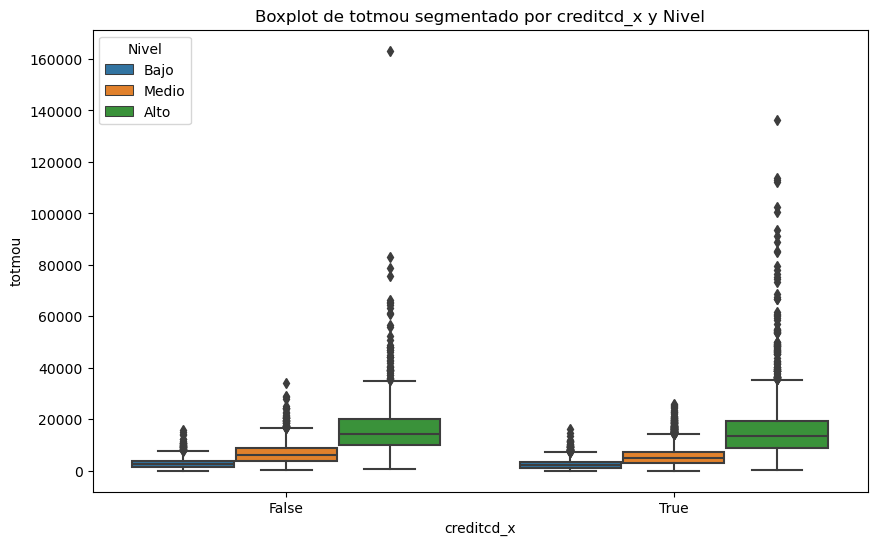

In [58]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_ejercicio4, x='creditcd_x', y='totmou', hue='Nivel')
plt.title('Boxplot de totmou segmentado por creditcd_x y Nivel')
plt.show()

# PUNTO NÚMERO 5 DE LA GUIA1 !!

6. Análisis de cada variable.

- El primer paso es la agrupación de variables en variables de tipo numericas y variables de tipo categoricas para hacer los respectivos análsis

In [59]:
# creo un df_final eliminando la columna creditcd_y y renombro creditcd_x a creditcd
df_final = df_unido.drop(columns=['creditcd_y'])
df_final.rename(columns={'creditcd_x':'creditcd'}, inplace=True)
df_final

,totmou,totrev,creditcd,eqpdays,Customer_ID,custcare_Mean,new_cell,area
0,7269.0,906.58,True,371,1082423,14.333333,U,NEW ENGLAND
1,13552.0,1172.25,False,83,1069232,3.666667,U,ATLANTIC SOUTH
2,4152.0,577.39,True,675,1031705,3.000000,U,NEW YORK CITY
3,1863.0,294.26,True,218,1089806,11.000000,U,CHICAGO
4,4155.0,433.16,False,222,1076695,0.000000,U,NORTH FLORIDA
...,...,...,...,...,...,...,...,...
9992,2570.0,484.31,True,611,1027614,0.666667,U,CHICAGO
9993,2105.0,583.36,True,1243,1098422,0.000000,U,SOUTHWEST
9994,3690.0,294.29,True,212,1096497,0.666667,Y,NEW ENGLAND
9995,3333.0,233.08,True,290,1087248,0.000000,U,CALIFORNIA NORTH


Por lo tanto quedaran los grupos de variables asi:

- Variables numéricas: totmou,totrev,eqpdays y custcare_Mean
- Variables categóricas: creditcd, new_cell y area

totrev: Ingresos del cliente.

totmou: Total de minutos usados por el cliente.

creditcd: Indicador de tarjeta de crédito.

eqpdays: Número de días (antigüedad) del equipo actual.

Customer_ID: Número identificador del cliente

custcare_mean: promedio de llamadas a servicio al cliente

new_cell: Nuevo usuario de telefono

area: localización

- Medidas estadísticas descriptivas para datos numéricos (media, mediana, moda, desviación  estándar, varianza, rango, etc.).

In [60]:
display(df_final[['totmou',"totrev","eqpdays","custcare_Mean"]].describe())

,totmou,totrev,eqpdays,custcare_Mean
count,9997.000000,9997.000000,9997.000000,9997.000000
mean,7693.083091,1042.102432,386.797739,1.897653
std,8658.559419,857.138573,252.710562,5.842978
min,0.000000,11.100000,0.000000,0.000000
25%,2576.000000,526.840000,210.000000,0.000000
50%,5262.000000,820.280000,338.000000,0.000000
75%,9823.000000,1272.950000,522.000000,1.666667
max,163264.176700,13426.600000,1823.000000,365.666667


c:\Users\tlsdz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tlsdz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tlsdz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tlsdz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

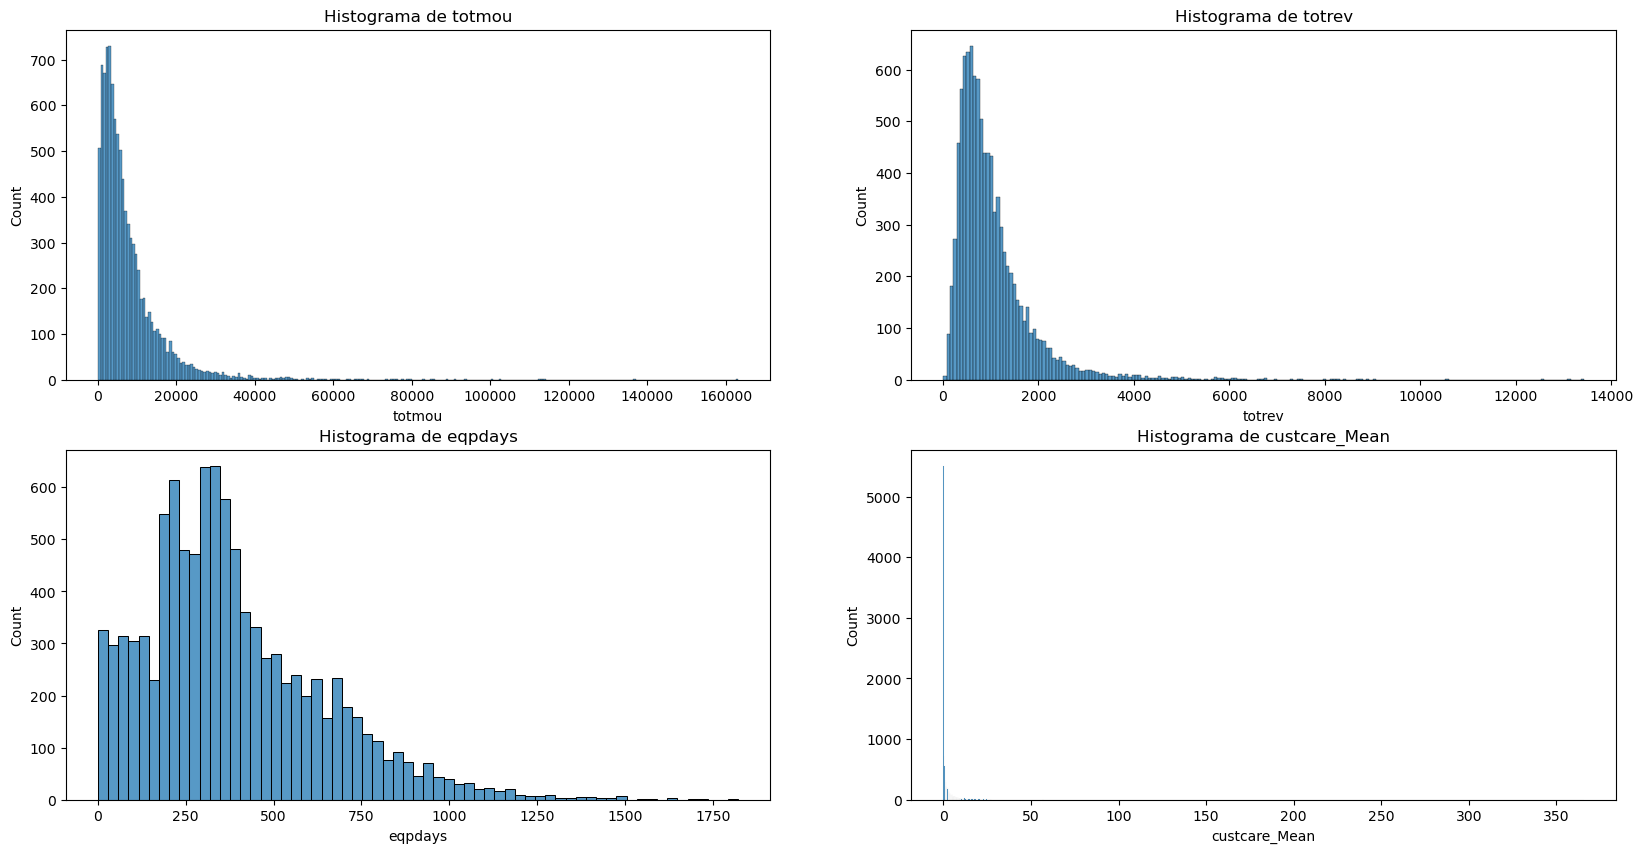

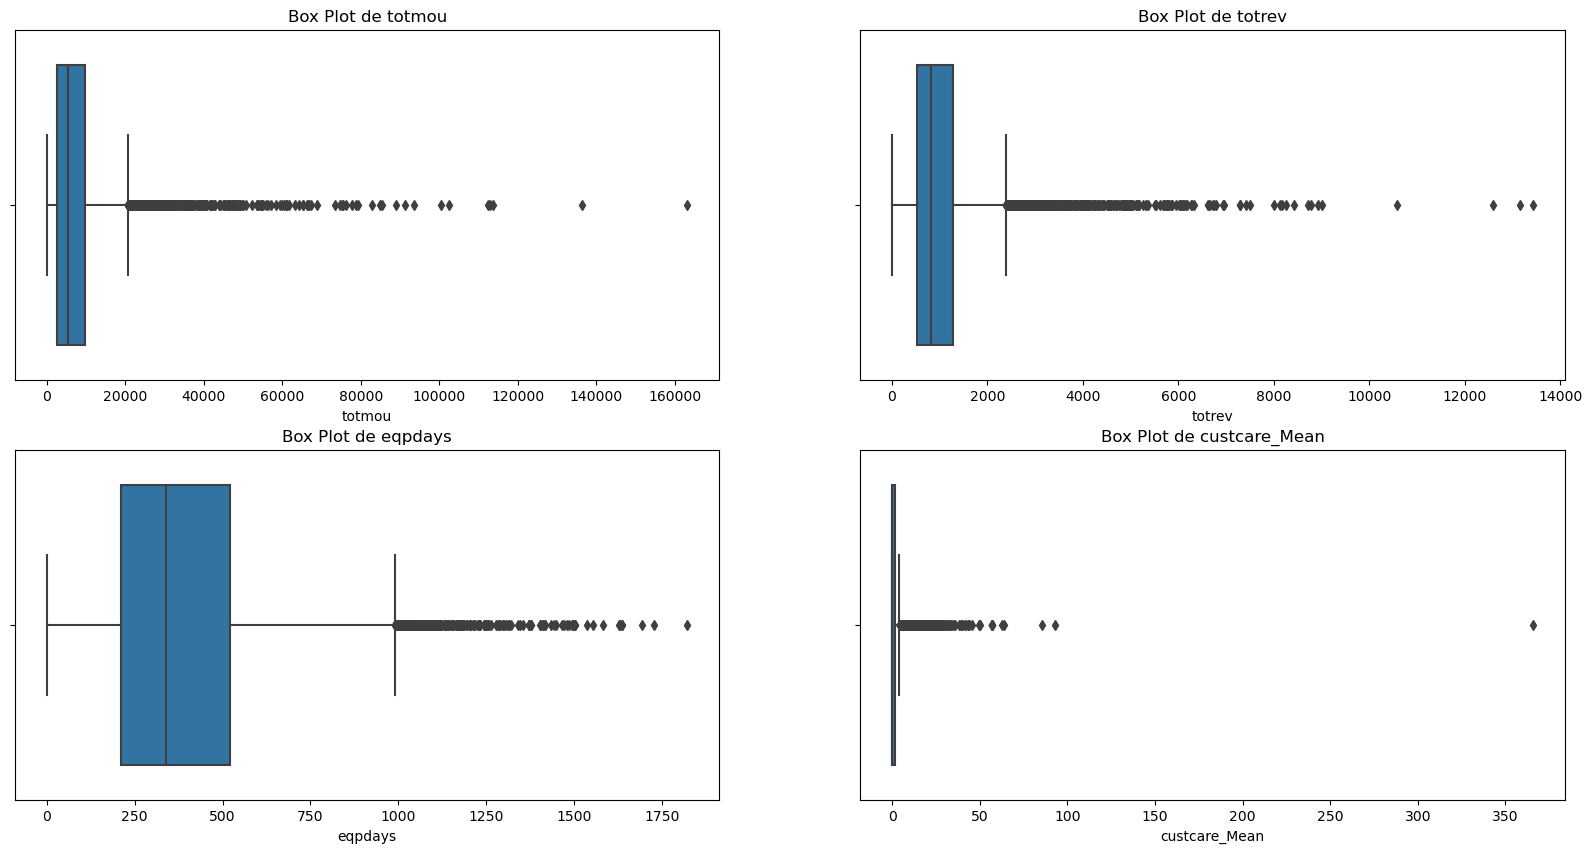

In [61]:
#Ahora grafico las variables numericas en un plot con varios graficos de tipo histograma
fig1, axs1 = plt.subplots(2,2, figsize=(20,10))
axs1[0][0].set_title("Histograma de totmou")
axs1[0][1].set_title("Histograma de totrev")
axs1[1][0].set_title("Histograma de eqpdays")
axs1[1][1].set_title("Histograma de custcare_Mean")
sns.histplot(x=df_final["totmou"], ax=axs1[0][0])
sns.histplot(x=df_final["totrev"], ax=axs1[0][1])
sns.histplot(x=df_final["eqpdays"], ax=axs1[1][0])
sns.histplot(x=df_final["custcare_Mean"], ax=axs1[1][1])
plt.show()
#ahora crea un plot que contenga un boxplot diferente por cada variable
fig, axs = plt.subplots(2,2, figsize=(20,10))
axs[0][0].set_title("Box Plot de totmou")
axs[0][1].set_title("Box Plot de totrev")
axs[1][0].set_title("Box Plot de eqpdays")
axs[1][1].set_title("Box Plot de custcare_Mean")
sns.boxplot(x=df_final["totmou"], ax=axs[0][0])
sns.boxplot(x=df_final["totrev"], ax=axs[0][1])
sns.boxplot(x=df_final["eqpdays"], ax=axs[1][0])
sns.boxplot(x=df_final["custcare_Mean"], ax=axs[1][1])
plt.show()

De los histogramas y de los box plot podemos intuir que la mayor parte de los datos estan agrupados en valores pequeños, no obstante en cada una de las variables encontramos valores a su vez muy grandes, esto ocasiona que lso boxplot se desplacen bastante a la izquierda, e incluso pareceria que hay muchos outliers en la información, aunque esto no se puede tomar como un hecho, ya que podría tratarse de una variabilidad normal, realizaré un grafico extra de los histogramas agrupados por area para ver si veo un comportamiento diferente

c:\Users\tlsdz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tlsdz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tlsdz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tlsdz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

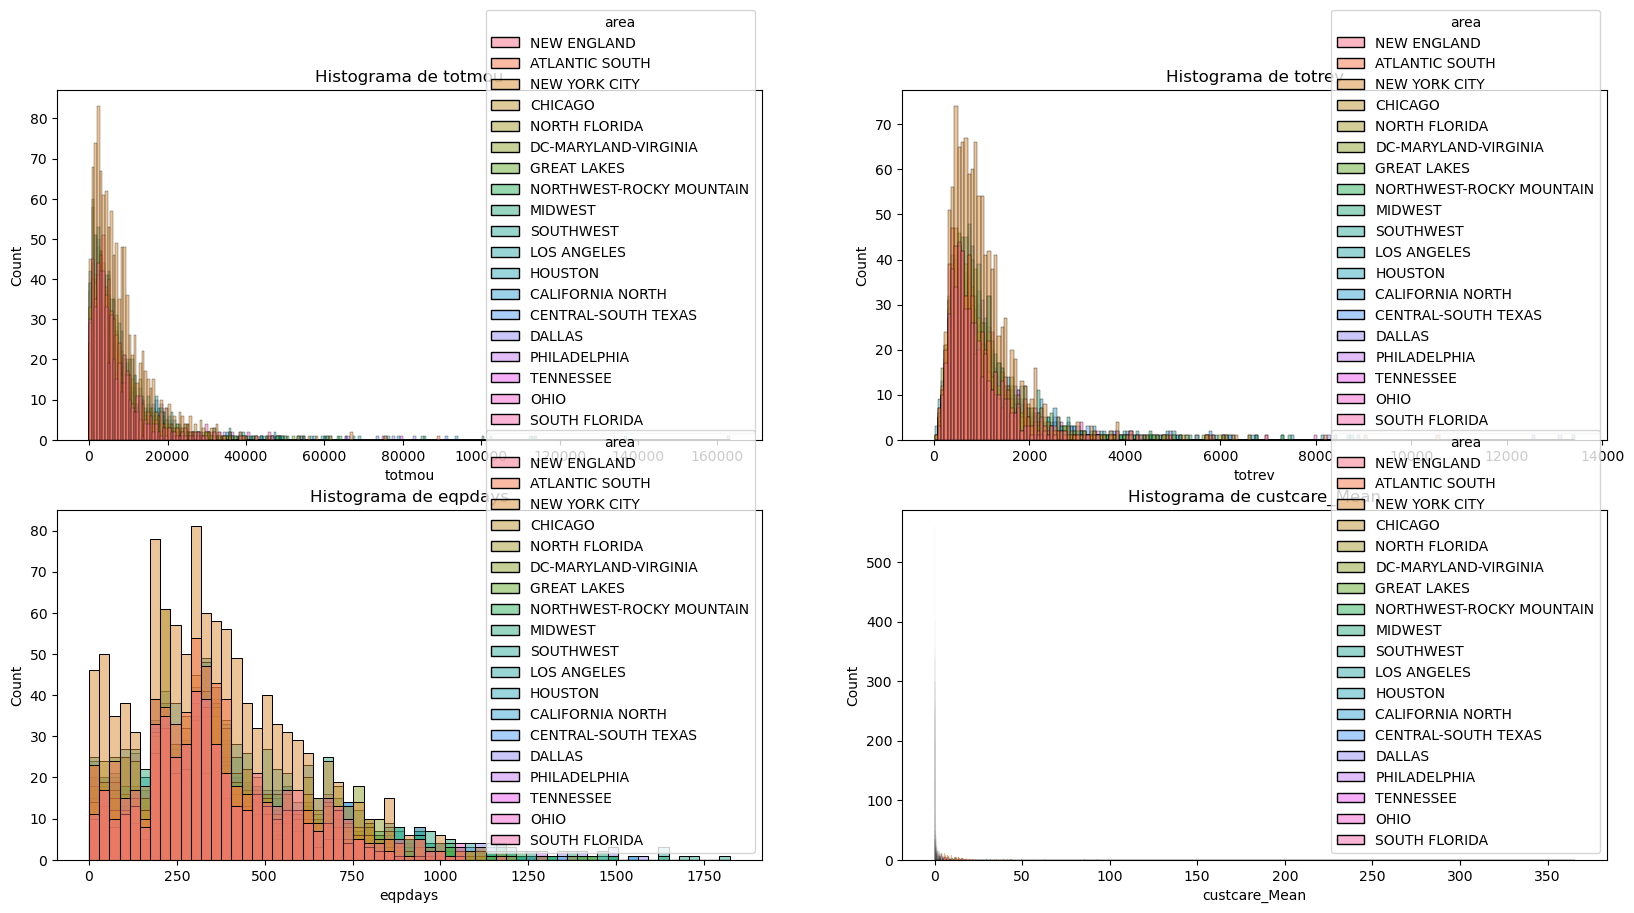

In [62]:
#Q
fig2, axs2 = plt.subplots(2,2, figsize=(20,10))
axs2[0][0].set_title("Histograma de totmou")
axs2[0][1].set_title("Histograma de totrev")
axs2[1][0].set_title("Histograma de eqpdays")
axs2[1][1].set_title("Histograma de custcare_Mean")
sns.histplot(x=df_final["totmou"], hue=df_final["area"], ax=axs2[0][0])
sns.histplot(x=df_final["totrev"], hue=df_final["area"], ax=axs2[0][1])
sns.histplot(x=df_final["eqpdays"], hue=df_final["area"], ax=axs2[1][0])
sns.histplot(x=df_final["custcare_Mean"], hue=df_final["area"], ax=axs2[1][1])
plt.show()

Una vez generado el grafico, se identifica un comportamiento similar al anterior

- Análisis de las variables categóricas (conteo de valores únicos, frecuencia de cada categoría).


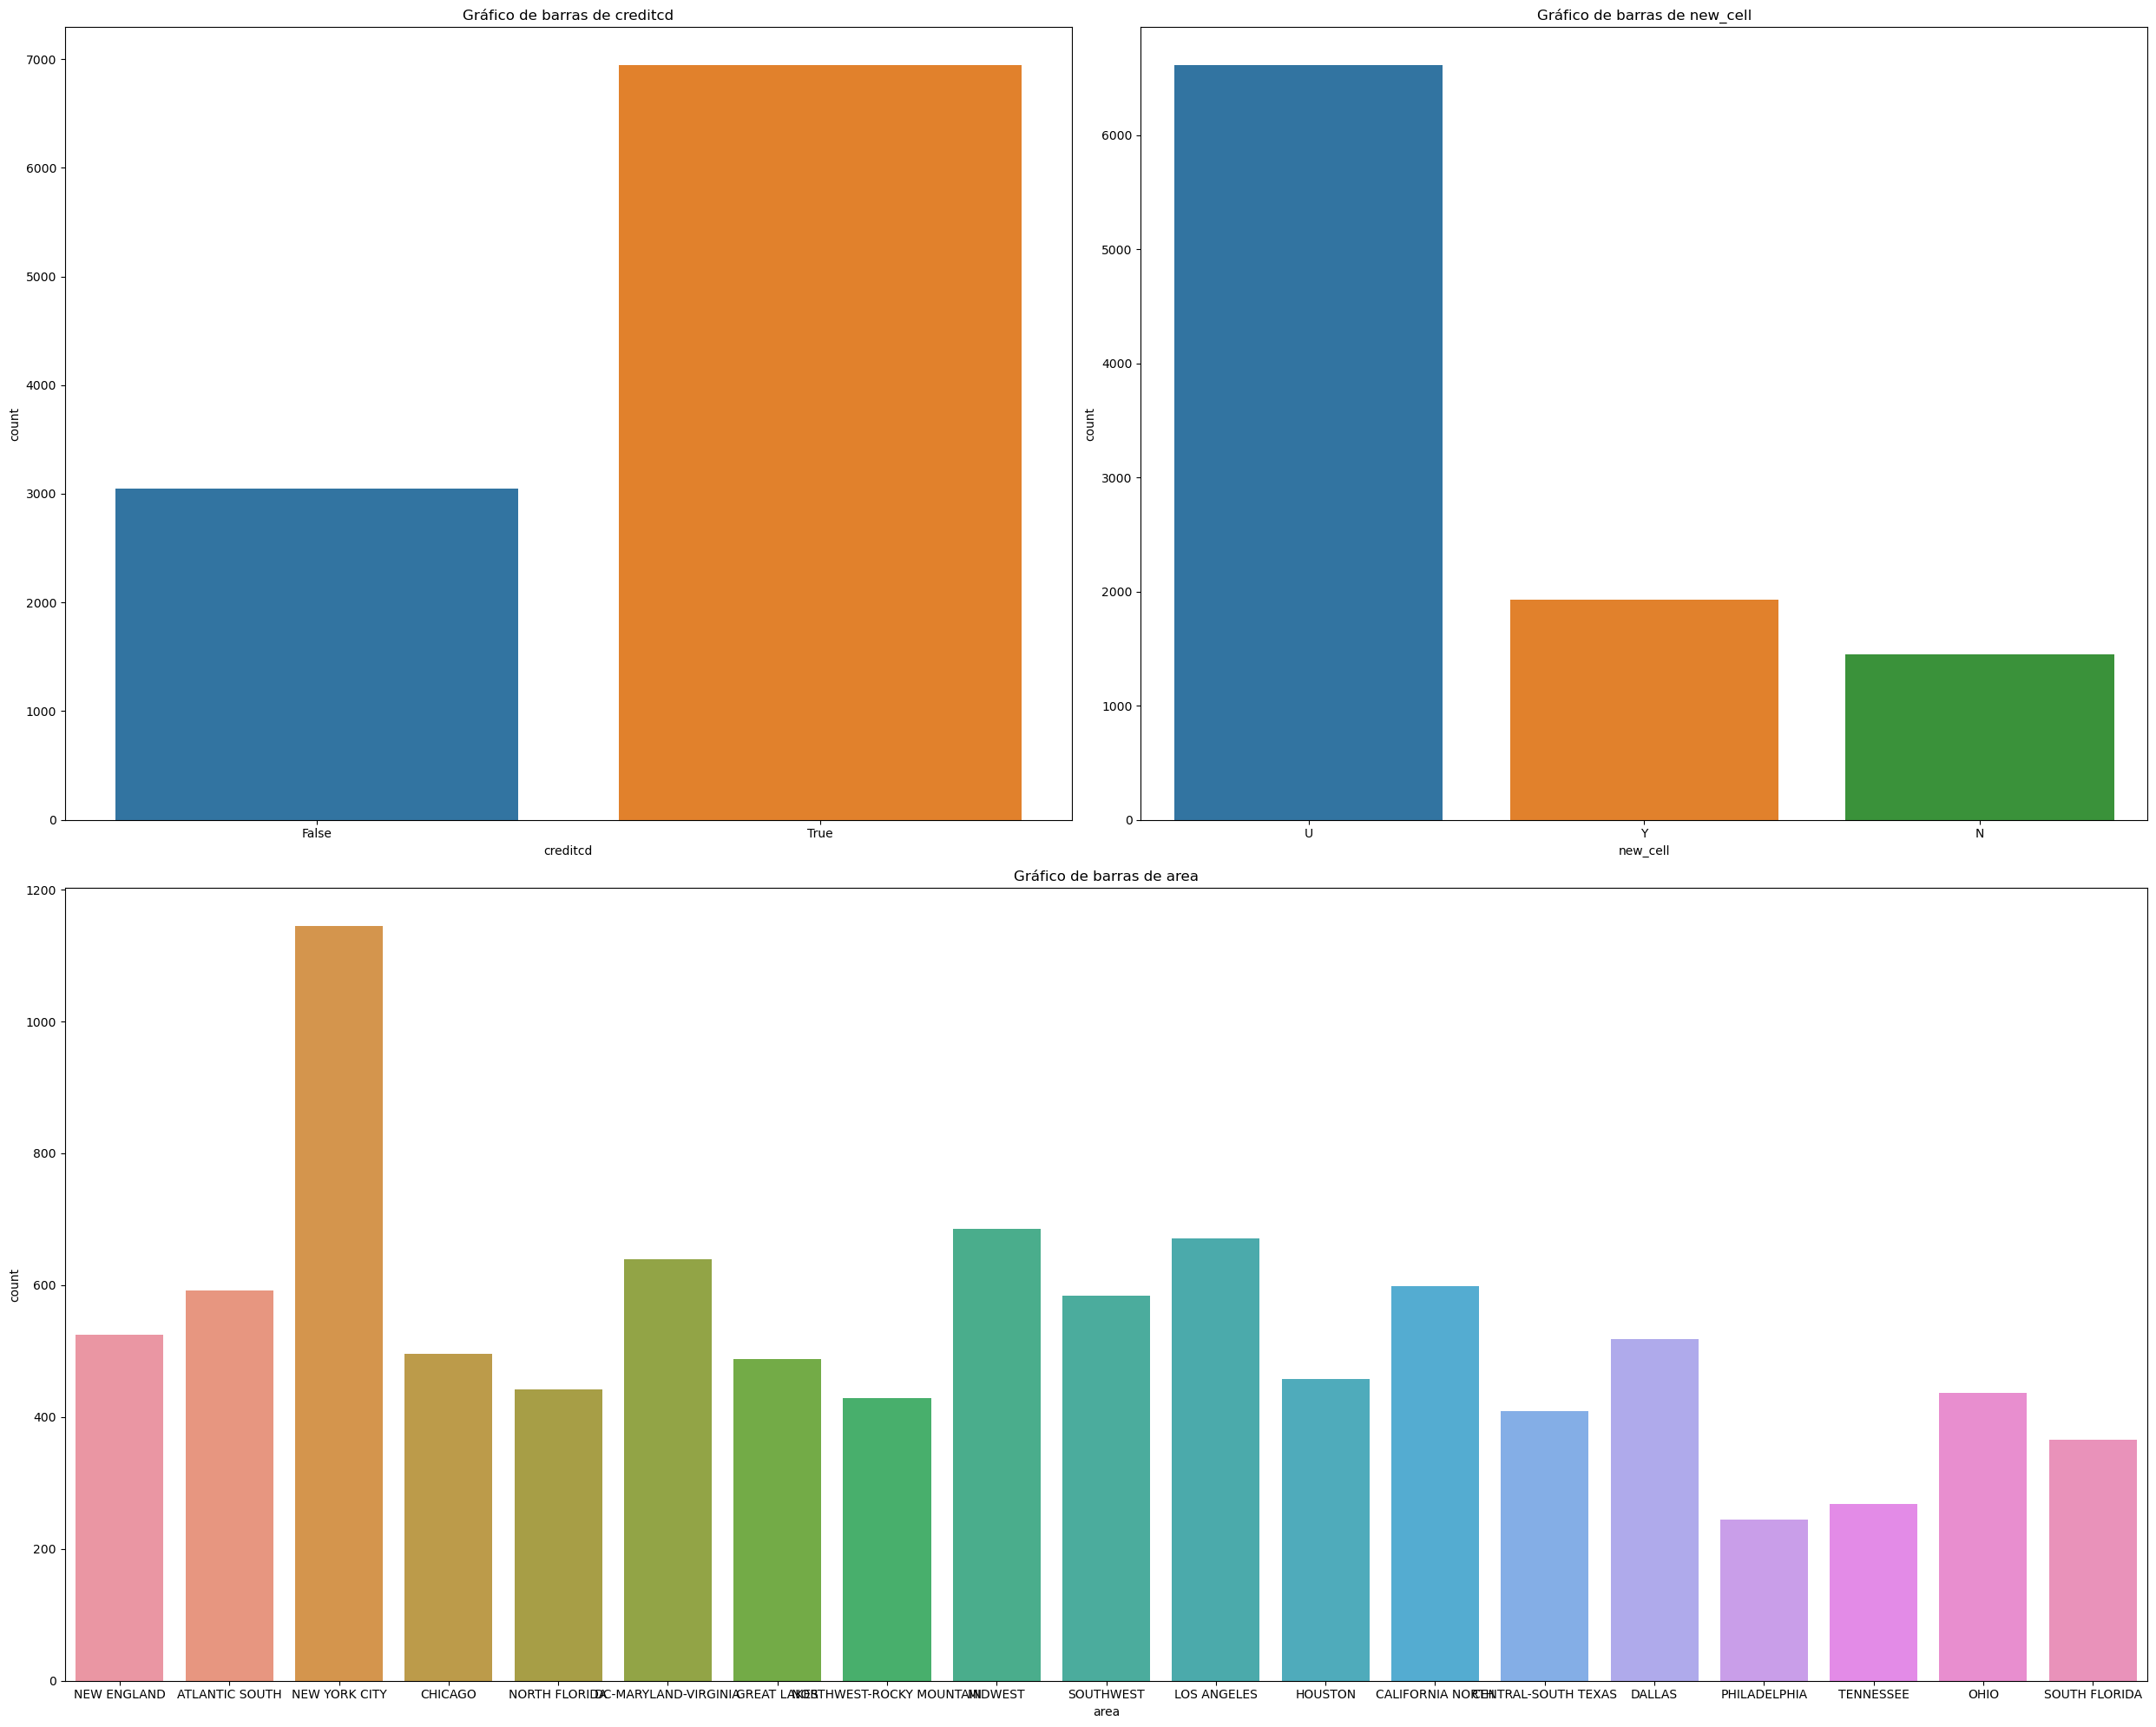

In [63]:
#Creo una nueva figura para los graficos de barras
fig3, axs3 = plt.subplots(2, 2, figsize=(25, 20), gridspec_kw={'width_ratios': [1, 1], 'height_ratios': [1, 1]})
#defino nombres de los 2 primeros graficos y genero 2 countplot para las primeras 2 variables
axs3[0][0].set_title("Gráfico de barras de creditcd")
axs3[0][1].set_title("Gráfico de barras de new_cell")
sns.countplot(x=df_final["creditcd"], ax=axs3[0][0])
sns.countplot(x=df_final["new_cell"], ax=axs3[0][1])
#Por temas de comodidad visual voy a eliminar los 2 plots de la parte de abajo para luego crear uno grande que contenga el countplo de areas
axs3[1][1].remove()
axs3[1][0].remove()
ax2 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax2.set_title("Gráfico de barras de area")
sns.countplot(x=df_final["area"], ax=ax2)

plt.tight_layout()
plt.show()

Ya que pudimos observar el comportamiento de cada variable individualmente pasaremos al proximo para que seria analizar el comportamiento entre 2 variables

7. Análisis de 2 variables para observar correlaciones.
    - Calcular correlación entre variables numéricas.

A continuación empezaré a realizar análsis bivariados matematicamente

# PUNTO NÚMERO 7 DE LA GUIA 1!! (esta antes que el 6 porque lo explique con la correlación calculada)

In [64]:
corr_totmou_totrev = df_final[["totmou","totrev"]].corr()
print("La correlación entre totmou y totrev es: ", corr_totmou_totrev.loc["totmou","totrev"])
corr_custcare = df_final[["totmou","custcare_Mean"]].corr()
print("La correlación entre totmou y custcare es: ", corr_custcare.loc["totmou","custcare_Mean"])
corr_eqpdays = df_final[["totmou","eqpdays"]].corr()
print("La correlación entre totmou y eqpdays es: ", corr_eqpdays.loc["totmou","eqpdays"])

La correlación entre totmou y totrev es:  0.8354689182022607
La correlación entre totmou y custcare es:  0.1619363115899398
La correlación entre totmou y eqpdays es:  -0.11021961012070193


A simple vista podemos ver 2 correlaciones positivas y una negativa, para este caso sería interesante unicamente tomar como valida la correlación de totmou con totrev, ya que es de casi 84% (entre mas cerca de 100% o -100% indica que tan correlacionadas estan las variables positiva y negativamente) lo cual es bastante util para posiblemente generar un modelo predictivo mas adelante


- calcular tabulación cruzada si hay más de una variable categórica.

Ahora para el caso de las variables categoricas haré uso de la tabulación cruzada para identificar relaciones entre las mismas

In [65]:
cross_tab1 = pd.crosstab(df_final['creditcd'], df_final['area'])
display(cross_tab1)
cross_tab2 = pd.crosstab(df_final['new_cell'], df_final['area'])
display(cross_tab2)
cross_tab3 = pd.crosstab(df_final['creditcd'], df_final['new_cell'])
display(cross_tab3)

area,ATLANTIC SOUTH,CALIFORNIA NORTH,CENTRAL-SOUTH TEXAS,CHICAGO,DALLAS,DC-MARYLAND-VIRGINIA,GREAT LAKES,HOUSTON,LOS ANGELES,MIDWEST,NEW ENGLAND,NEW YORK CITY,NORTH FLORIDA,NORTHWEST-ROCKY MOUNTAIN,OHIO,PHILADELPHIA,SOUTH FLORIDA,SOUTHWEST,TENNESSEE
creditcd,,,,,,,,,,,,,,,,,,,
False,211,192,122,167,145,203,126,120,210,181,154,357,137,148,107,68,109,213,81
True,381,407,287,329,373,437,362,338,461,504,371,788,305,281,330,177,257,371,187


area,ATLANTIC SOUTH,CALIFORNIA NORTH,CENTRAL-SOUTH TEXAS,CHICAGO,DALLAS,DC-MARYLAND-VIRGINIA,GREAT LAKES,HOUSTON,LOS ANGELES,MIDWEST,NEW ENGLAND,NEW YORK CITY,NORTH FLORIDA,NORTHWEST-ROCKY MOUNTAIN,OHIO,PHILADELPHIA,SOUTH FLORIDA,SOUTHWEST,TENNESSEE
new_cell,,,,,,,,,,,,,,,,,,,
N,82,77,67,53,85,83,82,82,42,129,70,180,74,58,68,32,59,65,60
U,430,399,223,376,331,433,311,275,577,394,364,689,312,295,295,136,209,400,167
Y,80,123,119,67,102,124,95,101,52,162,91,276,56,76,74,77,98,119,41


new_cell,N,U,Y
creditcd,,,
False,413,2074,564
True,1035,4542,1369


De este análisis no puedo generar una conjetura respecto a los valores obtenidos, por el momento solo observare la distribución que poseen los datos

- Gráficos (dispersión, box plots).

ahora generaré graficos de dispersion y tipo box sobre las variables que nos interesaron para ver su comportamiento graficamente, el grafico de dispersion será entre totmou y totrev, por otro lado el grafico de boxplot lo realizare entre totmou y area

# PUNTO NÚMERO 6 DE LA GUIA 1!!

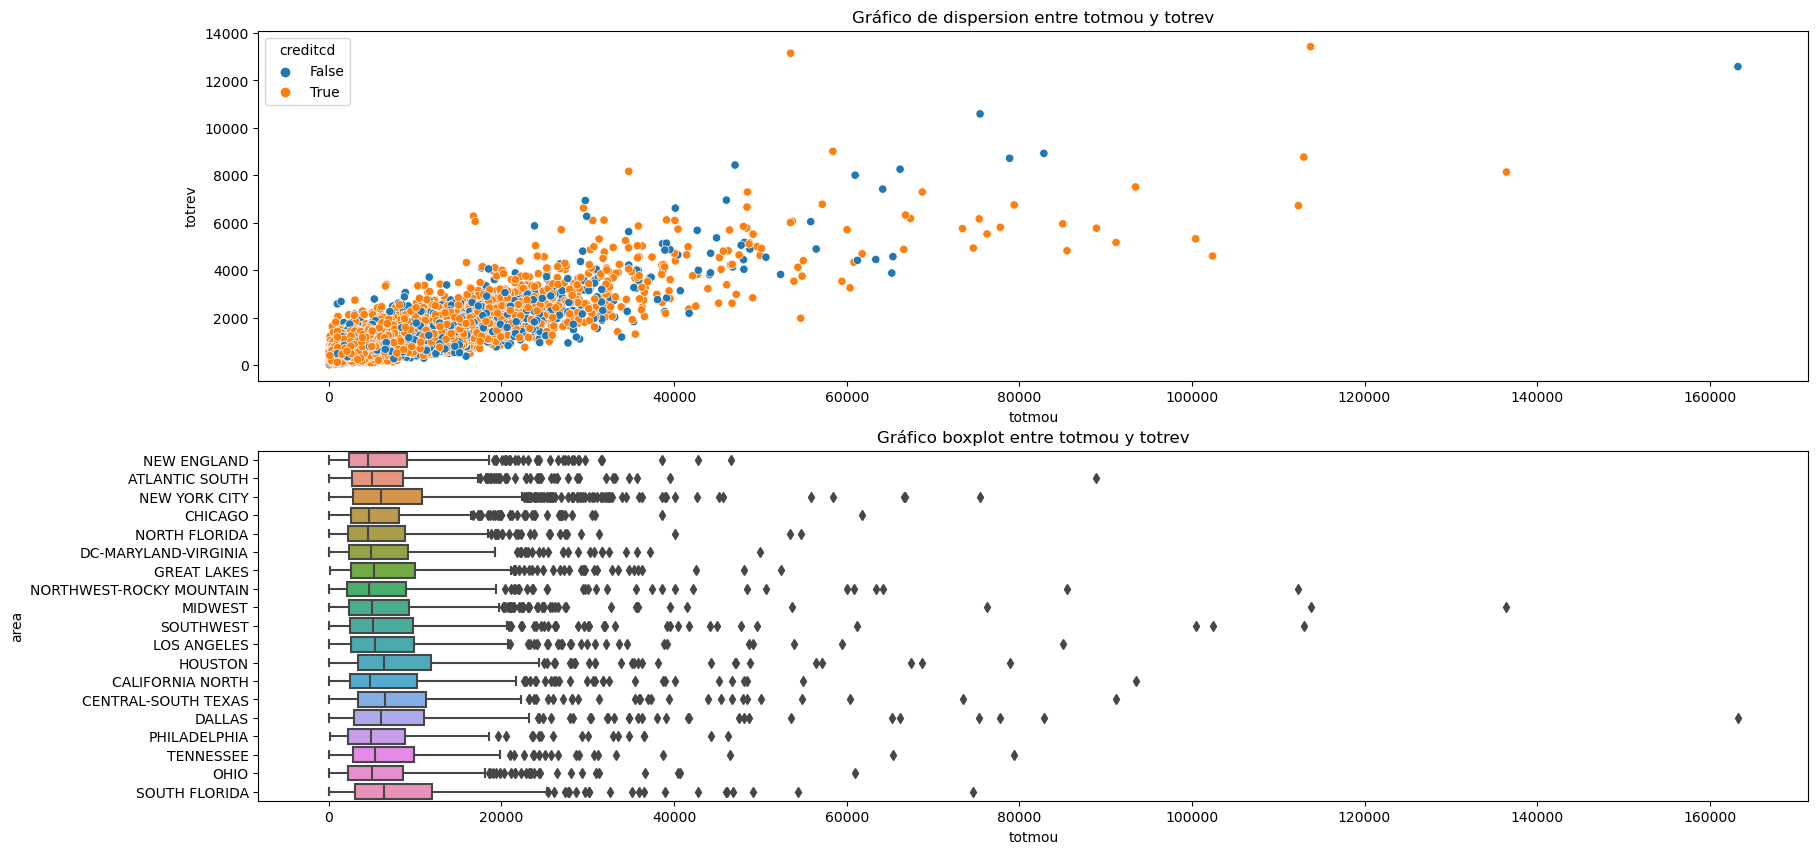

In [66]:
fig4, axs4 = plt.subplots(2,1, figsize=(20,10))
axs4[0].set_title("Gráfico de dispersion entre totmou y totrev")
axs4[1].set_title("Gráfico boxplot entre totmou y totrev")
sns.scatterplot(data=df_final, x='totmou', y='totrev',ax=axs4[0],hue='creditcd')
sns.boxplot(data=df_final, x='totmou', y='area',ax=axs4[1])
plt.show()

De estas gráficas podemos observar a simplevista la correlación positiva que identificamos un poco antes, por otro lado, del boxplot podemos observar que areas tienen valores mas alejados de sus primeros 4 quantiles

8. Análisis multivariable
    - Gráficos (heatmap, pairplots).

Para este analisis revisaremos la matriz de correlación y su grafica de tipo heatmap así como la grafica pairplot que nos dira a grandes rasgos las correlaciones entre todas nuestras variables numéricas

In [67]:
corr_matriz = df_final[["totmou","totrev","creditcd","eqpdays","custcare_Mean"]].corr()
corr_matriz

,totmou,totrev,creditcd,eqpdays,custcare_Mean
totmou,1.000000,0.835469,-0.045409,-0.110220,0.161936
totrev,0.835469,1.000000,0.005097,0.061597,0.038450
creditcd,-0.045409,0.005097,1.000000,0.116752,-0.076723
eqpdays,-0.110220,0.061597,0.116752,1.000000,-0.154700
custcare_Mean,0.161936,0.038450,-0.076723,-0.154700,1.000000


De esta matriz de correlación podemos observar en primera instancia la correlación que ya habiamos detectado previamente entre totmou y totrev, y aparentemente tambien nos estamos dando cuenta de que no existe una correlación relevante para ninguna de las demás variables, eso podrá evidenciarse mejor en el heatmap que veremos a continuación

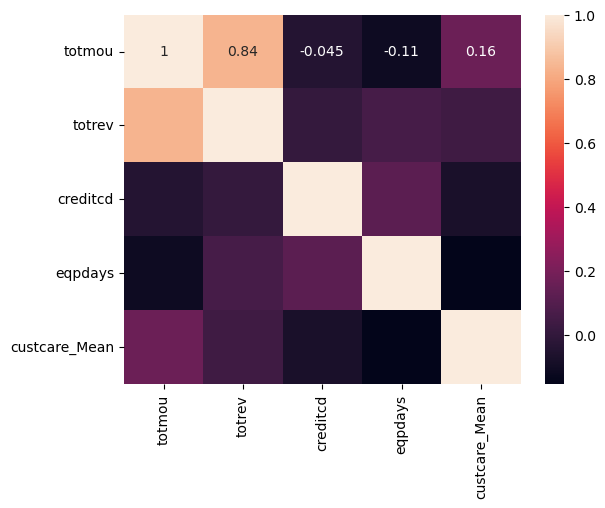

In [68]:
sns.heatmap(corr_matriz, annot=True)
plt.show()

Una vez graficado el heatmap nos da la posibilidad de revisar las correlaciones mas comodamente

A continuación tambien generare un pair plot, que nos permite ver el comportamiento de las variables numericas y además tambien observar este comportamiento respecto a una variable puntual, como podria ser creditcd

c:\Users\tlsdz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tlsdz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tlsdz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tlsdz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

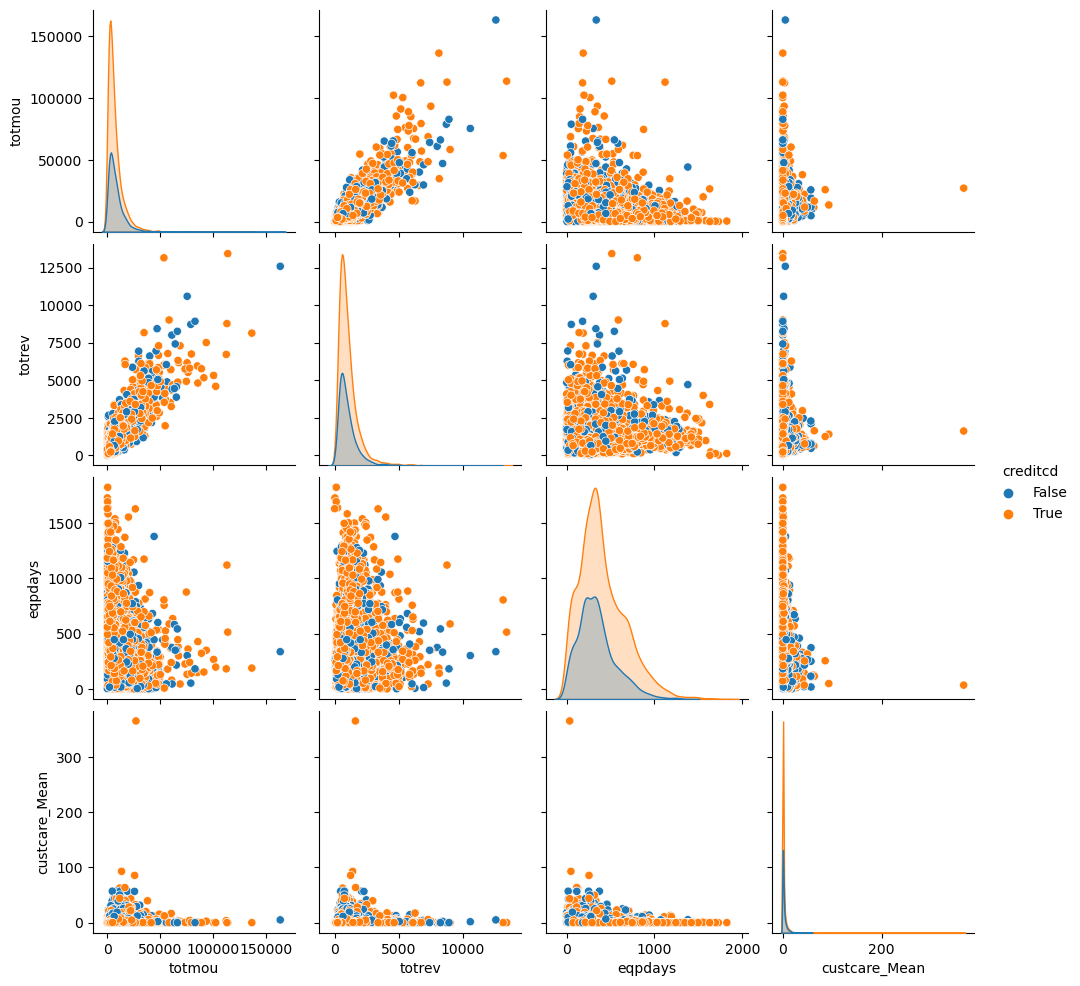

In [69]:
#Creo un pair plot con las variables totmou, totrev, eqpdays, custcare_Mean y creditcd
sns.pairplot(df_final[["totmou","totrev","eqpdays","custcare_Mean","creditcd"]],hue="creditcd")
plt.show()

# PUNTO NÚMERO 8 DE LA GUIA 1!!

De este pair plot podríamos indentificar que el cuando el cliente tiene un credito la cantidad de ingresos y de minutos usados podria ser mayor, esto lo podemos identificar viendo las areas bajo la curva presentes en los graficos [0][0] y [1][1] Correspondientes respectivamente a la variable totmou y totrev

9. Detección de outliers.
    - Método IQR

A continuación generare un metodo común para detectar outliers en datos, esta basado en cuartiles, la idea del metodo es calcular el cuartil 25% y el cuartil 75% luego restarlos para obtener el valor IQR (rango intercuartil) y posteriormente establecer 2 limites restando y sumando los cuartiles a la multiplicación entre el rango intercuartil y 1.5, ese ultimo valor corresponde a que tantas "Desviaciones estandar estamos dispuestos a tolerar" este valor puede ser cambiado arbitrariamente por nosotros mismos, pero hay que tener cuidado con un valor muy alto o bajo, ya que puede afectar significativamente la detección de los outliers

In [70]:
#realizo detección de outliers para la columna totmou y totrev por el metodo IQR
Q1 = df_final["totmou"].quantile(0.25)
Q3 = df_final["totmou"].quantile(0.75)
IQR = Q3 - Q1
print("El rango intercuartil para totmou es: ", IQR)
outliers_totmou = df_final[(df_final["totmou"] < (Q1 - 1.5 * IQR)) | (df_final["totmou"] > (Q3 + 1.5 * IQR))]
print("Los outliers para totmou son: ")
display(outliers_totmou)

El rango intercuartil para totmou es:  7247.0
Los outliers para totmou son: 


,totmou,totrev,creditcd,eqpdays,Customer_ID,custcare_Mean,new_cell,area
18,24069.00000,2129.74,True,199,1018015,2.000000,N,NEW ENGLAND
34,36302.00000,5020.37,True,257,1008208,2.000000,N,DALLAS
38,59449.00000,3531.09,True,380,1015658,0.000000,U,LOS ANGELES
42,21518.05000,2769.67,True,657,1001867,11.333333,Y,HOUSTON
49,21991.00000,2809.08,True,241,1005704,0.000000,Y,MIDWEST
...,...,...,...,...,...,...,...,...
9916,26069.00000,1650.44,True,601,1045567,0.000000,U,HOUSTON
9931,26534.13333,3396.97,True,1628,1000346,0.000000,N,MIDWEST
9968,24124.00000,2288.89,True,163,1000609,0.000000,Y,MIDWEST
9976,23083.00000,2419.69,True,80,1056910,4.666667,U,MIDWEST


In [71]:
#realizo detección de outliers para la columna totmou y totrev por el metodo IQR
Q1 = df_final["totrev"].quantile(0.25)
Q3 = df_final["totrev"].quantile(0.75)
IQR = Q3 - Q1
print("El rango intercuartil para totrev es: ", IQR)
outliers_totrev = df_final[(df_final["totrev"] < (Q1 - 1.5 * IQR)) | (df_final["totmou"] > (Q3 + 1.5 * IQR))]
print("Los outliers para totrev son: ")
display(outliers_totrev)

El rango intercuartil para totrev es:  746.11
Los outliers para totrev son: 


,totmou,totrev,creditcd,eqpdays,Customer_ID,custcare_Mean,new_cell,area
0,7269.0,906.58,True,371,1082423,14.333333,U,NEW ENGLAND
1,13552.0,1172.25,False,83,1069232,3.666667,U,ATLANTIC SOUTH
2,4152.0,577.39,True,675,1031705,3.000000,U,NEW YORK CITY
4,4155.0,433.16,False,222,1076695,0.000000,U,NORTH FLORIDA
5,5441.0,578.80,True,68,1091652,7.000000,U,NEW YORK CITY
...,...,...,...,...,...,...,...,...
9991,6531.0,663.21,False,276,1093976,11.333333,Y,PHILADELPHIA
9992,2570.0,484.31,True,611,1027614,0.666667,U,CHICAGO
9994,3690.0,294.29,True,212,1096497,0.666667,Y,NEW ENGLAND
9995,3333.0,233.08,True,290,1087248,0.000000,U,CALIFORNIA NORTH


Si bien este metodo nos podrá decir en muchos casos lo que podría considerarse como outlier en un data set, podemos apreciar que no esta funcionando del todo bien, ya que tenemos 9997 filas en nuestro data set, y está calculando en el segundo caso 7709 como outliers, esto reduce mucho la confianza en este metodo, por lo que analizaré otro diferente llamado z score con la ayuda de otra libreria de python

- Método Z-score

A continuacion importo de la libreria scipy stats y uso el metodo z.score para la detección de outliers para la columna totmou y totrev

In [72]:
from scipy import stats
z_scores_totmou = np.abs(stats.zscore(df_final["totmou"]))
outliers_totmouz = df_final[z_scores_totmou > 3]
print("Los outliers para totmou son: ")
display(outliers_totmouz)

Los outliers para totmou son: 


,totmou,totrev,creditcd,eqpdays,Customer_ID,custcare_Mean,new_cell,area
34,36302.00,5020.37,True,257,1008208,2.000000,N,DALLAS
38,59449.00,3531.09,True,380,1015658,0.000000,U,LOS ANGELES
136,34375.00,5251.98,True,288,1015715,0.000000,Y,NEW YORK CITY
182,36563.00,2053.30,True,81,1024580,2.333333,Y,PHILADELPHIA
233,35613.00,3296.49,True,105,1002619,0.333333,Y,MIDWEST
...,...,...,...,...,...,...,...,...
9701,66184.05,8260.37,False,543,1001692,0.000000,N,DALLAS
9811,47770.00,5053.74,False,601,1039359,2.000000,U,SOUTHWEST
9828,53887.00,3535.38,True,8,1097978,12.333333,N,LOS ANGELES
9903,41453.00,4651.43,True,509,1004580,0.000000,U,MIDWEST


In [73]:
z_scores_totrev = np.abs(stats.zscore(df_final["totrev"]))
outliers_totrevz = df_final[z_scores_totrev > 3]
print("Los outliers para totrev son: ")
display(outliers_totrevz)

Los outliers para totrev son: 


,totmou,totrev,creditcd,eqpdays,Customer_ID,custcare_Mean,new_cell,area
34,36302.00,5020.37,True,257,1008208,2.000000,N,DALLAS
136,34375.00,5251.98,True,288,1015715,0.000000,Y,NEW YORK CITY
328,35754.00,5029.68,True,813,1017671,0.000000,U,DC-MARYLAND-VIRGINIA
356,45447.00,4034.72,True,115,1002013,0.000000,Y,CENTRAL-SOUTH TEXAS
427,76260.00,5526.11,True,361,1001813,0.000000,N,MIDWEST
...,...,...,...,...,...,...,...,...
9701,66184.05,8260.37,False,543,1001692,0.000000,N,DALLAS
9780,33660.00,4247.85,True,206,1099258,0.333333,U,LOS ANGELES
9811,47770.00,5053.74,False,601,1039359,2.000000,U,SOUTHWEST
9903,41453.00,4651.43,True,509,1004580,0.000000,U,MIDWEST


Podemos observar que este metodo fue mas efectivo, ya que redujimos significativamente la cantidad de outliers detectados, ojo, esto no quiere decir que de verdad los valores detectados sean outliers, sino que deberiamos revisar esos valores para nosotros tener un criterio mas adecuado

- Tomar una decisión respecto a que hacer con los outliers detectados

Quería generar este análisis de outliers unicamente con proposito academico, pero en mi opinión yo no quitaria ningun valor para este caso, probablemente con un par de excepciones, ya que siento que los valores detectados como outliers no hacen parte de un error en este caso sino de un valor atipico normal dentro del ejercicio. Con esto daría fin al análisis exploratorio